# **CH.SC.U4CSE23239 - Logistic Regression - Exercise 3**

In [27]:
import pandas as pd
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn import metrics
import seaborn as sn

uploaded = files.upload();
data = pd.read_csv('market.csv')

Saving market.csv to market.csv


In [28]:
print(data.shape)
data.head()

(24, 4)


,Purchasing behaviour,Gender,Age,Time spent in online shop
0,Buy now,female,22,40
1,Buy now,female,25,23
2,Buy now,male,18,12
3,Buy now,male,45,28
4,Buy now,female,12,43


In [29]:
gender_map = {'male': 0, 'female': 1}
behaviour_map = {"Don't buy anything": 0, 'Buy later': 0, 'Buy now': 1}
data['Gender'] = data['Gender'].map(gender_map)
data['Purchasing behaviour'] = data['Purchasing behaviour'].map(behaviour_map)
data.head()

,Purchasing behaviour,Gender,Age,Time spent in online shop
0,1,1,22,40
1,1,1,25,23
2,1,0,18,12
3,1,0,45,28
4,1,1,12,43


In [30]:
data.columns = ['Behaviour','Gender','Age','Time_spent']
data.head()

,Behaviour,Gender,Age,Time_spent
0,1,1,22,40
1,1,1,25,23
2,1,0,18,12
3,1,0,45,28
4,1,1,12,43


In [31]:
data.isnull().sum()
feature_col = ['Age','Gender','Time_spent']
x = data[feature_col]
y = data.Behaviour
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=35)
display(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(19, 3)

(19,)

(5, 3)

(5,)

In [32]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [33]:
conf_mat = metrics.confusion_matrix(y_test,y_pred)
print('Confusion Matrix : ', conf_mat)
Accuracy_score = metrics.accuracy_score(y_test,y_pred)
print('Accuracy Score : ', Accuracy_score)
print('Accuracy in Percentage : ', int(Accuracy_score*100),'%')

Confusion Matrix :  [[2 0]
 [2 1]]
Accuracy Score :  0.6
Accuracy in Percentage :  60 %


<Axes: xlabel='Predicted', ylabel='Actual'>

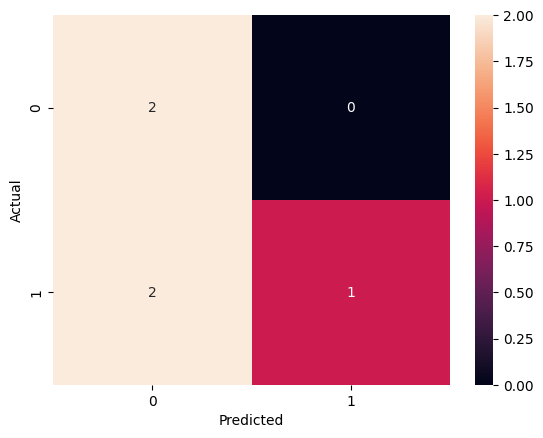

In [34]:
conf_mat = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(conf_mat, annot=True)